<a href="https://colab.research.google.com/github/Guillermo100472109/Aprendizaje-Automatico/blob/main/Entrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA
Realice un EDA simplificado, principalmente para determinar cúantas variables e instancias hay, qué
variables son categóricas/ordinales/numéricas, si hay variables categóricas con alta cardinalidad, qué
variables tienen valores faltantes y cuántos, si hay columnas constantes o columnas de ID, y si se trata
de un problema de regresión o clasificación. Si es esto último, ¿está desbalanceado?
Este EDA se utilizará como guía cuando haya que llevar a cabo el preproceso de los datos.
https://www.kaggle.com/code/imoore/intro-to-exploratory-data-analysis-eda-in-python

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)

In [ ]:
df = pd.read_csv('/content/attrition_availabledata_09.csv')
df


,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,7.434015,8,3,3,4.0,2.0,3.0,25,Travel_Rarely,Research & Development,...,Y,11,8,1,4.0,3,3,1,2,No
1,6.572103,15,4,3,3.0,3.0,3.0,18,Non-Travel,Research & Development,...,Y,18,8,0,0.0,5,0,0,0,Yes
2,8.075888,4,3,3,1.0,4.0,3.0,33,Travel_Frequently,Sales,...,Y,14,8,1,15.0,2,15,8,12,No
3,8.694279,6,3,3,4.0,3.0,2.0,37,Travel_Rarely,Sales,...,Y,14,8,0,17.0,3,3,1,0,No
4,6.646379,9,3,4,1.0,4.0,3.0,56,Travel_Rarely,Human Resources,...,Y,21,8,0,5.0,3,4,1,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,5.622518,16,2,4,1.0,2.0,2.0,50,Travel_Rarely,Sales,...,Y,23,8,0,28.0,2,10,1,6,No
2936,9.553096,4,3,3,4.0,2.0,3.0,41,Travel_Rarely,Research & Development,...,Y,19,8,2,8.0,0,5,1,2,No
2937,6.734752,19,1,3,2.0,2.0,4.0,40,Travel_Rarely,Research & Development,...,Y,12,8,0,7.0,2,5,1,3,No
2938,8.035525,14,2,3,3.0,4.0,3.0,44,Travel_Rarely,Research & Development,...,Y,12,8,0,8.0,2,2,2,2,No


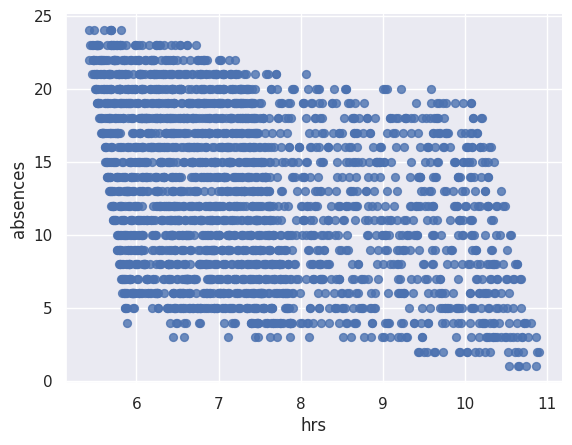

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='hrs', y='absences', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Se interpreta que las abstenciones laborales son anuales y las horas la media de horas trabajadas diaria. Las personas que trabajan menos de las 8 horas diarias correspondientes de media tienen mayor núemero de abstenciones, acalando así que cuanto más veces faltas al trabajo menos horas de media semanal tienes.

In [ ]:
df.count()

,0
hrs,2868
absences,2868
JobInvolvement,2868
PerformanceRating,2868
EnvironmentSatisfaction,2868
JobSatisfaction,2868
WorkLifeBalance,2868
Age,2868
BusinessTravel,2868
Department,2868


In [ ]:
df.count(axis='columns')

,0
0,31
1,31
2,31
3,31
4,31
...,...
2935,31
2936,31
2937,31
2938,31


**IMPORTANTE: ELIMINAR ESTAS MISMAS COLUMNAS EN LOS DATOS DE COMPETICIÓN**

Columnas superfluas: gender, employeecount, over18, employeeID, standardHours

In [ ]:
df = df.drop(['Gender', 'EmployeeCount', 'Over18', 'EmployeeID', 'StandardHours'], axis=1)
df.head(5)

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,7.434015,8,3,3,4.0,2.0,3.0,25,Travel_Rarely,Research & Development,...,100960,0.0,11,1,4.0,3,3,1,2,No
1,6.572103,15,4,3,3.0,3.0,3.0,18,Non-Travel,Research & Development,...,109650,1.0,18,0,0.0,5,0,0,0,Yes
2,8.075888,4,3,3,1.0,4.0,3.0,33,Travel_Frequently,Sales,...,31800,1.0,14,1,15.0,2,15,8,12,No
3,8.694279,6,3,3,4.0,3.0,2.0,37,Travel_Rarely,Sales,...,20860,4.0,14,0,17.0,3,3,1,0,No
4,6.646379,9,3,4,1.0,4.0,3.0,56,Travel_Rarely,Human Resources,...,25590,1.0,21,0,5.0,3,4,1,0,Yes


In [ ]:
df.shape

(2940, 26)

In [ ]:
Se eliminan filas duplicadas (si existen)

SyntaxError: invalid syntax (<ipython-input-26-b7ba00cc43ed>, line 1)

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 26)


In [ ]:
print(df.isnull().sum())

hrs                         0
absences                    0
JobInvolvement              0
PerformanceRating           0
EnvironmentSatisfaction    17
JobSatisfaction            12
WorkLifeBalance            29
Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         10
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           5
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition                   0
dtype: int64


Se observa que del conjunto total de datos hay 2940 líneas totales, pero hay varias variables que no tienen todos esos datos. Hay que eliminar las filas sin esos datos.

In [ ]:
df = df.dropna()
print(df.isnull().sum())

hrs                        0
absences                   0
JobInvolvement             0
PerformanceRating          0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
Attrition                  0
dtype: int64


Se han borrados todos los valores null

In [ ]:
df.count()

,0
hrs,2868
absences,2868
JobInvolvement,2868
PerformanceRating,2868
EnvironmentSatisfaction,2868
JobSatisfaction,2868
WorkLifeBalance,2868
Age,2868
BusinessTravel,2868
Department,2868


Ahora ya tenemos todas las filas completas

In [ ]:
Veamos si hay correalción entre las el número de horas trabajadas y las ausencias

In [ ]:
sns.boxplot(x=df['hrs'])

Vemos que hay un grupo de outliers, veamos la relación más de cerca.

In [ ]:
 filtered_df = df[df['hrs'] > 10]  # Create a new DataFrame with filtered data
#sns.boxplot(x=filtered_df['hrs']) # Create the box plot using the filtered data
filtered_df.count()
sns.scatterplot(x=filtered_df['hrs'], y=filtered_df['absences'])

In [ ]:
 filtered_df = df[df['hrs'] < 10]  # Create a new DataFrame with filtered data
#sns.boxplot(x=filtered_df['hrs']) # Create the box plot using the filtered data
filtered_df.count()
sns.scatterplot(x=filtered_df['hrs'], y=filtered_df['absences'])

No podemos sacar conclusiones sobre esta relación, asi que seguimos investigando posibles relaciones.
Ahora veremos si el estado civil influye en el número de faltas

In [ ]:
sns.barplot(x='MaritalStatus', y='absences', data=df, estimator=np.mean)


No se ve una relación clara entre el estado civil y el número de faltas, por tanto no es una columna interesante


Tras mirar varias posibles columnas superflas sin encontrar resultados. Hemos terminado el EDA simplificado. Ahora tenemos los datos limpios para poder crear los modelos correspondientes.

# Elección de  Evaluación

Para garantizar una evaluación robusta y confiable del rendimiento del modelo, se adoptará un esquema de evaluación en dos niveles: una evaluación externa (outer) para estimar el rendimiento futuro del modelo y una evaluación interna (inner) para la selección y optimización de modelos.

3.1 Evaluación Externa

La estimación del rendimiento futuro del modelo se llevará a cabo utilizando la estrategia de Holdout, con una partición de los datos en train (2/3) y test (1/3). El objetivo es disponer de un conjunto de test  que no haya sido utilizado durante el proceso de entrenamiento ni en la selección del modelo, asegurando así una evaluación realista.

Las métricas principales a utilizar serán:

Balanced Accuracy: Adecuada en escenarios con desbalance de clases, ya que calcula el promedio entre la tasa de verdaderos positivos (TPR) y la tasa de verdaderos negativos (TNR).
True Positive Rate (TPR) y True Negative Rate (TNR): Para evaluar la precisión en la detección de la clase positiva y negativa, respectivamente.
Accuracy: Aunque es una métrica estándar, puede ser menos representativa en conjuntos de datos desbalanceados, por lo que se utilizará de manera complementaria.
Matriz de confusión: Para proporcionar una visualización detallada de los errores del modelo y evaluar posibles sesgos en la clasificación.
Es importante destacar que la partición de test se utilizará únicamente al final, cuando se haya decidido cuál es la mejor alternativa de modelado. Hasta ese momento, la evaluación se realizará exclusivamente en el conjunto de entrenamiento para evitar la fuga de datos y una sobreestimación del desempeño del modelo.

3.2 Evaluación Interna:

La evaluación interna se empleará para la optimización de hiperparámetros (Hyperparameter Optimization - HPO) y la comparación de distintos modelos. Para ello, se utilizarán técnicas de validación cruzada en el conjunto de entrenamiento, como:

K-Fold Cross-Validation: Dividiendo los datos de entrenamiento en k subconjuntos, entrenando el modelo en k-1 y validándolo en el restante, iterativamente.
Stratified K-Fold Cross-Validation: En caso de un desbalance de clases, se empleará una variante estratificada para mantener la proporción de clases en cada partición.
Este enfoque permitirá evaluar distintas configuraciones del modelo y seleccionar la mejor sin recurrir al conjunto de test, asegurando que el rendimiento final refleje la capacidad real del modelo para generalizar a datos no vistos.

En resumen, se establece una estrategia de doble evaluación para garantizar un proceso sistemático y riguroso en la selección y validación del modelo, minimizando el riesgo de sobreajuste y maximizando su capacidad predictiva en datos futuros.


# Métodos Básicos: KNN y Trees

Evaluación inicial de KNN con hiperparámetros por omisión

In [ ]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier()

print(df.columns)

Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'Over18', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition'],
      dtype='object')


In [ ]:
X = df.drop(['Attrition'], axis=1)
y = df['Attrition']


In [ ]:
from sklearn.model_selection import train_test_split
clf.fit(X['DistanceFromHome'].to_numpy().reshape(-1, 1), y)
#
import pandas as pd

travel_mapping = {
        'Travel_Rarely': 1,
        'Non-Travel': 0,
        'Travel_Frequently': 2
    }

df['BusinessTravel_Numeric'] = df['BusinessTravel'].map(travel_mapping)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, y_train.shape) # 100 instances for training
print(X_test.shape, y_test.shape)

(1969, 30) (1969,)
(971, 30) (971,)


TRANSFORMACIÓN DE COLUMNAS CATEGORICAS EN NUMÉRICAS

In [ ]:
import pandas as pd

# VER LAS COL POR TIPOS
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print(categorical_cols)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(numerical_cols)

['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'Attrition']
['hrs', 'absences', 'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Numeric']


PIPELINE DE NUM COL

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import chi2, SelectPercentile
from sklearn.linear_model import LogisticRegression

numeric_features = ['hrs', 'absences', 'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Numeric']

numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)
categorical_features = [['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'Attrition']

]
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)
"""clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)"""
########################################



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix



# Separar en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42, stratify=y)

# Crear el pipeline con MinMaxScaler y KNN
pipe_knn = Pipeline([
    ('preprocessor', preprocessor()),
    ('knn', KNeighborsClassifier())
])

# Entrenar el modelo KNN
clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))


TypeError: 'ColumnTransformer' object is not callable

# Avanzados: Modelos Lineales y SVMS

# Resultados y modelo final

# Elección abierta
